# 8장 다층 퍼셉트론

[<img src="https://raw.githubusercontent.com/taehojo/taehojo.github.io/master/assets/images/linktocolab.png" align="left"/> ](https://colab.research.google.com/github/taehojo/deeplearning/blob/master/colab/ch08-colab.ipynb)

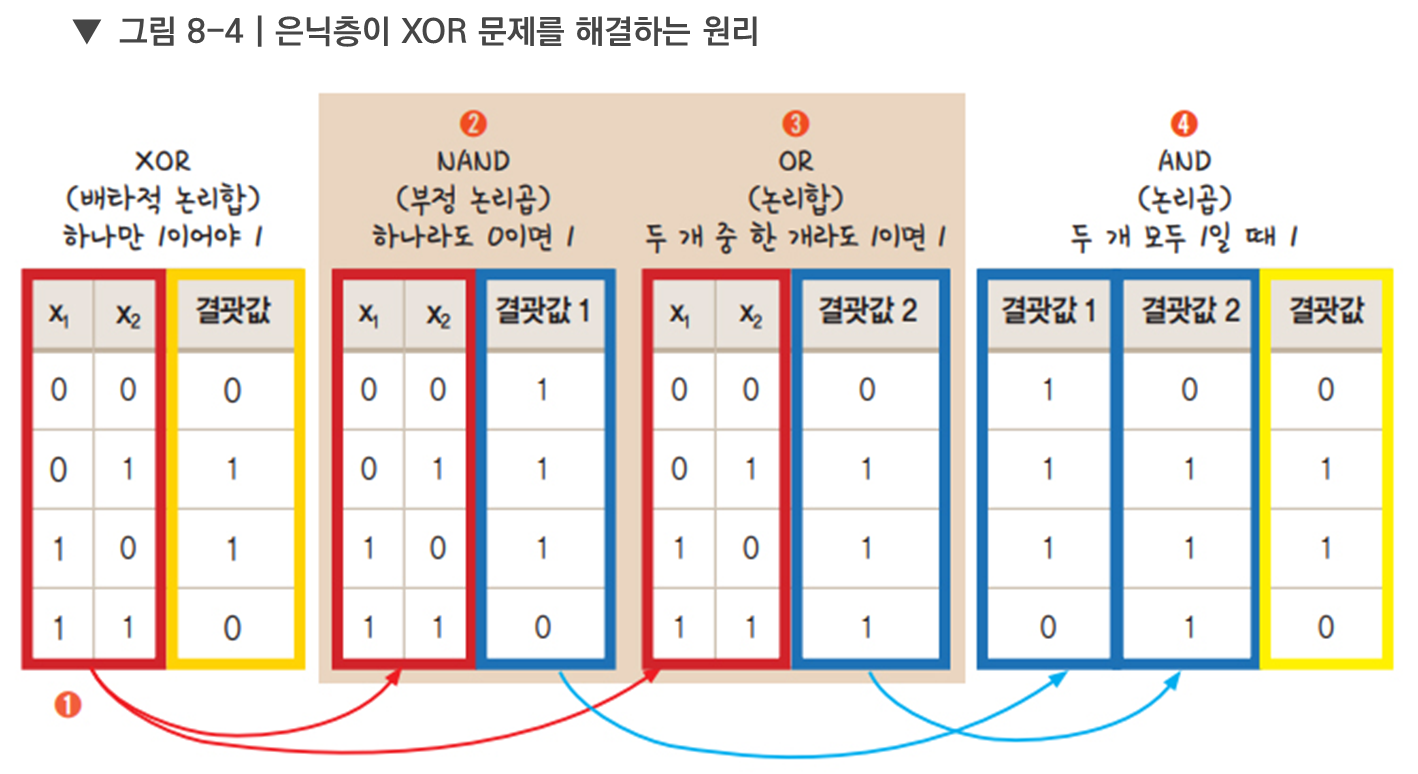

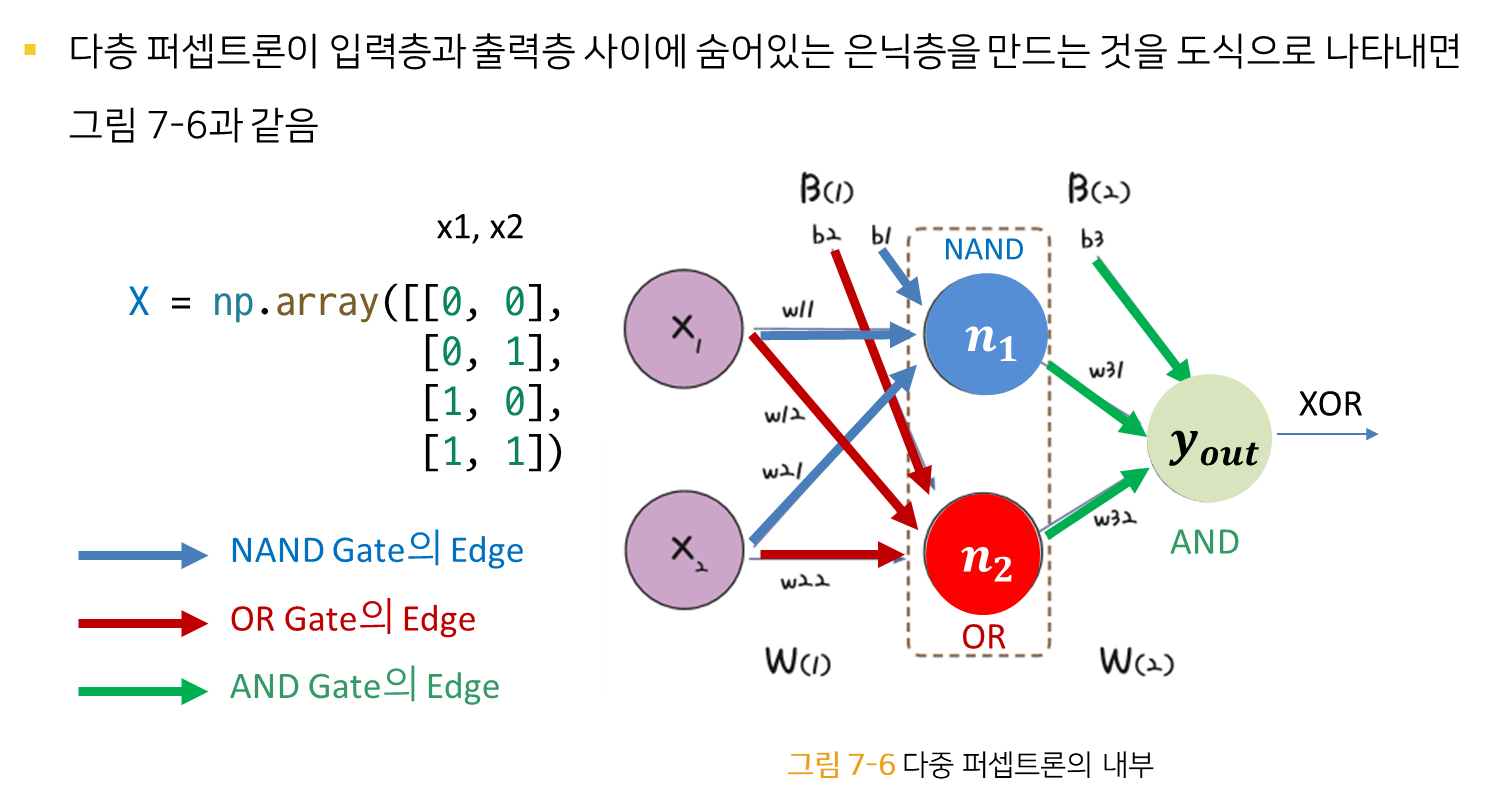
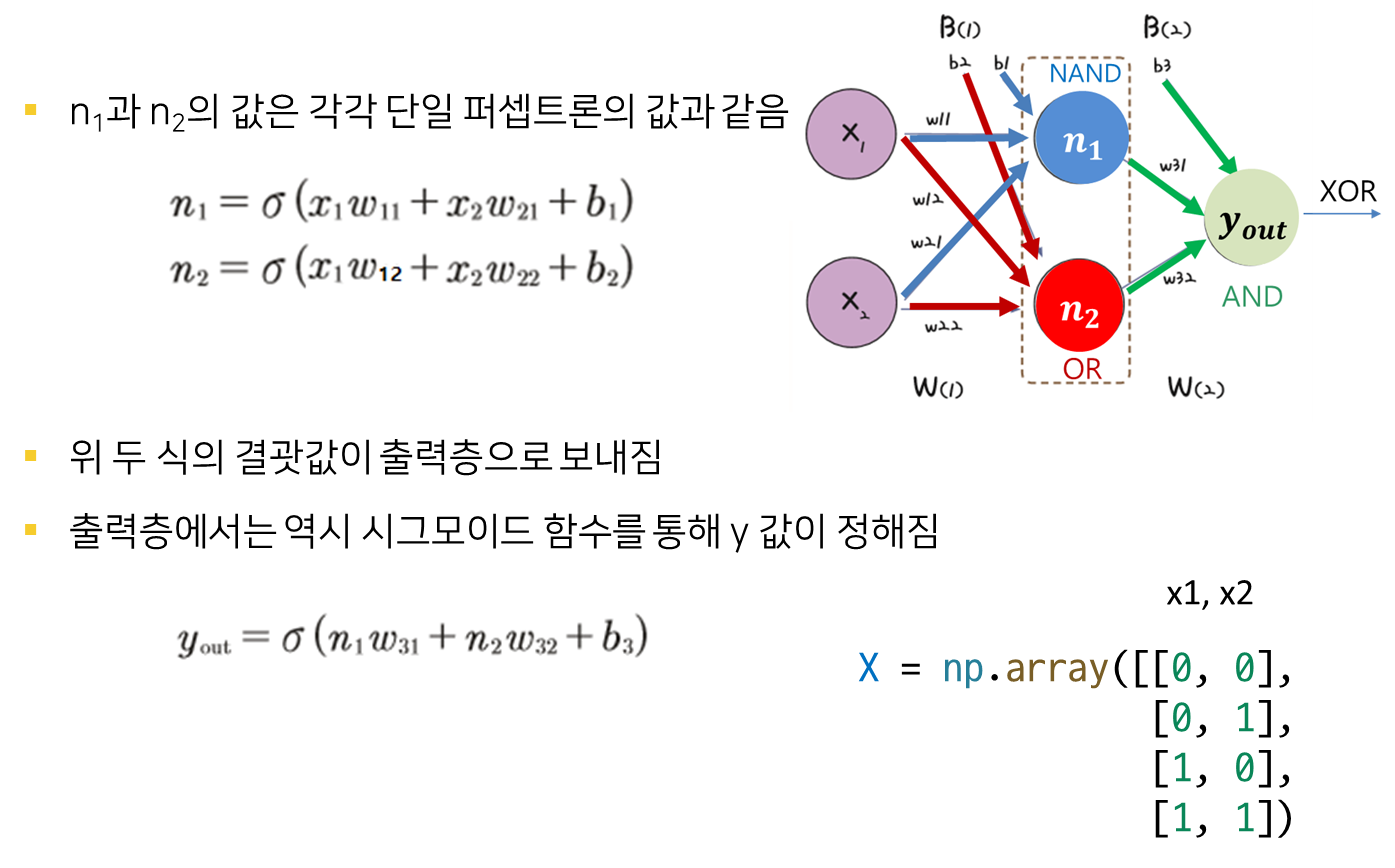

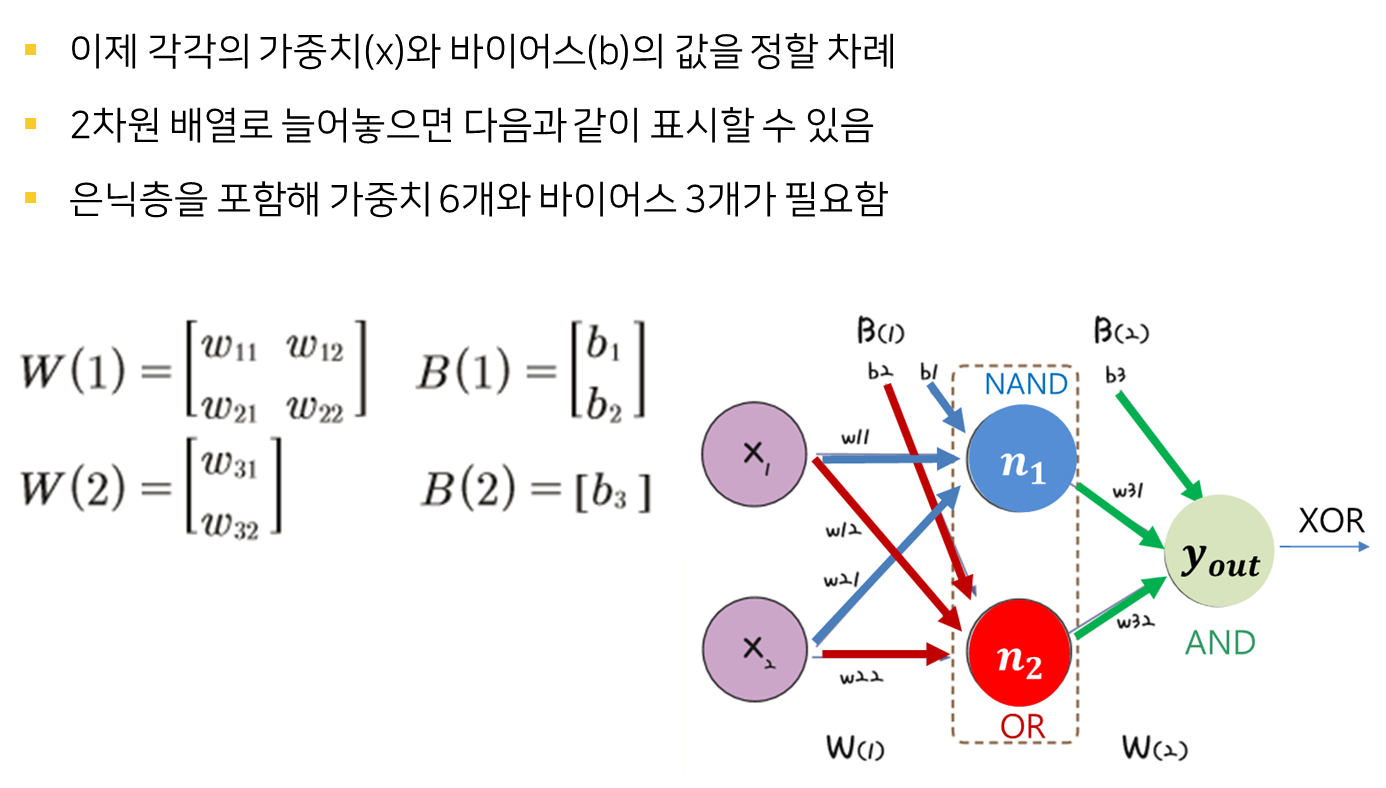

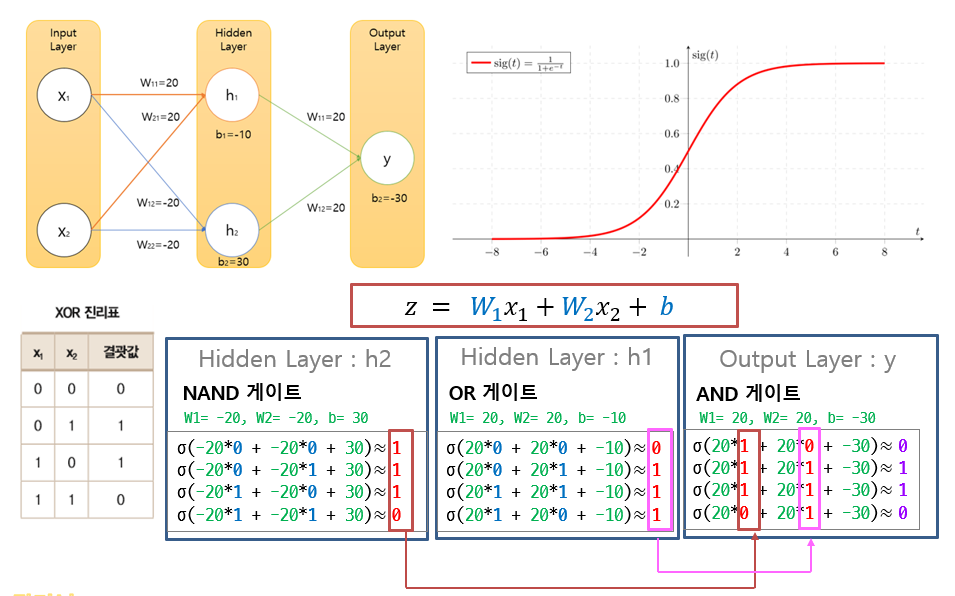

In [2]:
# NAND GATE

def NAND(x1, x2):
    w1, w2, b = -20, -20, 30
    y = x1 * w1 + x2 * w2 + b
    
    if y <= 0:  # 임계치
        return 0
    else:
        return 1
    
print(NAND(0, 0))
print(NAND(1, 0))
print(NAND(0, 1))
print(NAND(1, 1))

1
1
1
0


In [3]:
# OR Gate

def OR(x1, x2):
    w1, w2, b = 20, 20, -10
    y = x1 * w1 + x2 * w2 + b
    if y <= 0:  # 임계치
        return 0
    else:
        return 1
    
print(OR(0, 0))
print(OR(1, 0))
print(OR(0, 1))
print(OR(1, 1))

0
1
1
1


In [4]:
# AND GATE

def AND(x1, x2):
    w1, w2, b = 20, 20, -30
    y = x1 * w1 + x2 * w2 + b
    if y <= 0:  # 임계치
        return 0
    else:
        return 1
    
print(AND(0, 0))
print(AND(1, 0))
print(AND(0, 1))
print(AND(1, 1))

0
0
0
1


In [5]:
AND(NAND(0, 0), OR(0, 0))

0

In [6]:
### XOR Gate!!!

def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

print(XOR(0, 0))
print(XOR(1, 0))
print(XOR(0, 1))
print(XOR(1, 1))

0
1
1
0


* W, b를 Matrix로 했을 때...

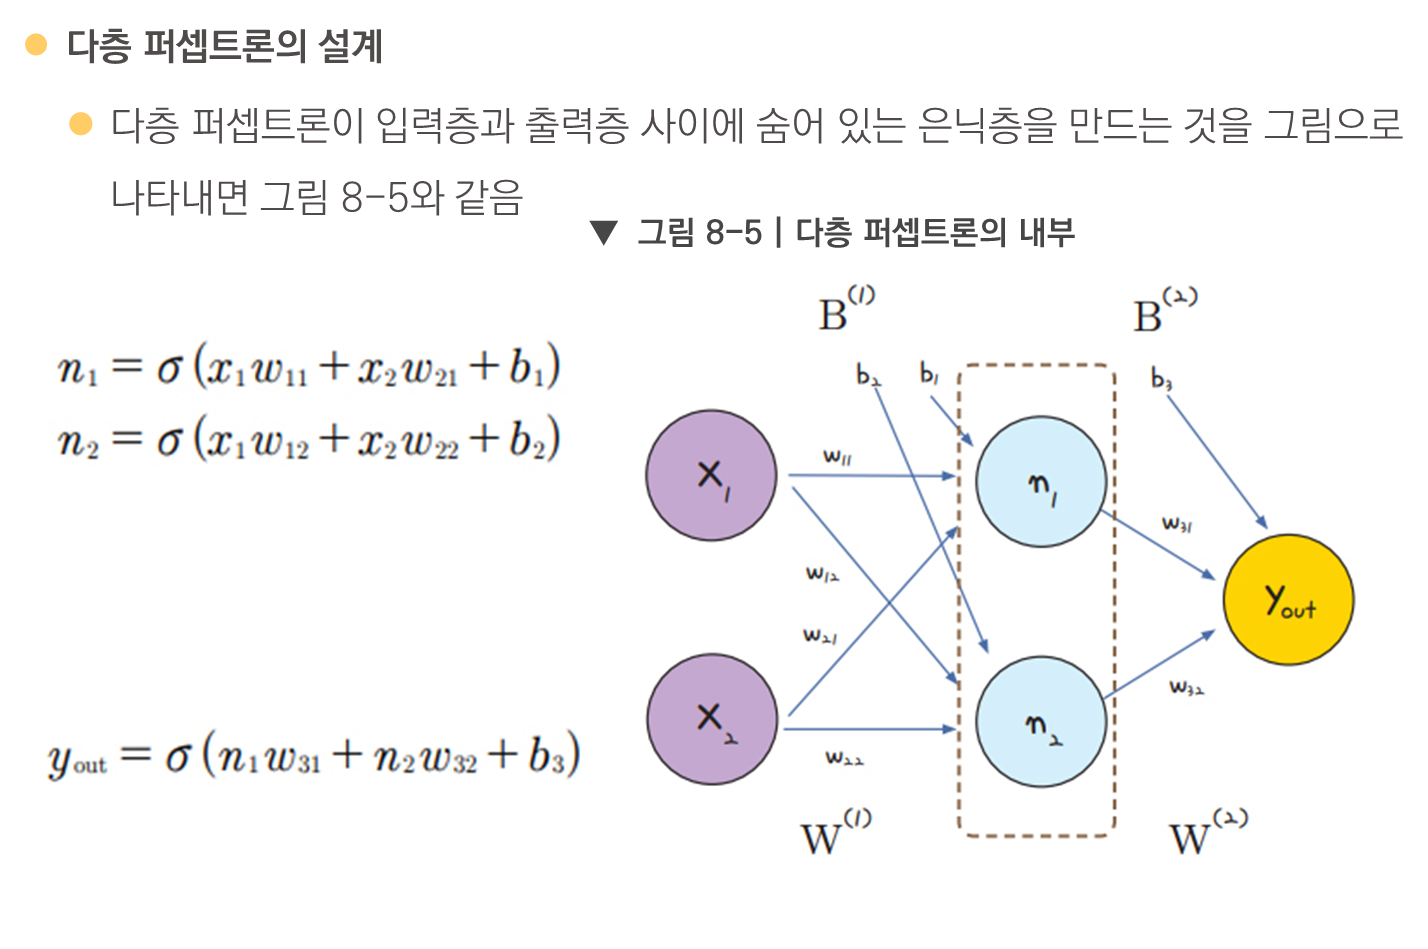

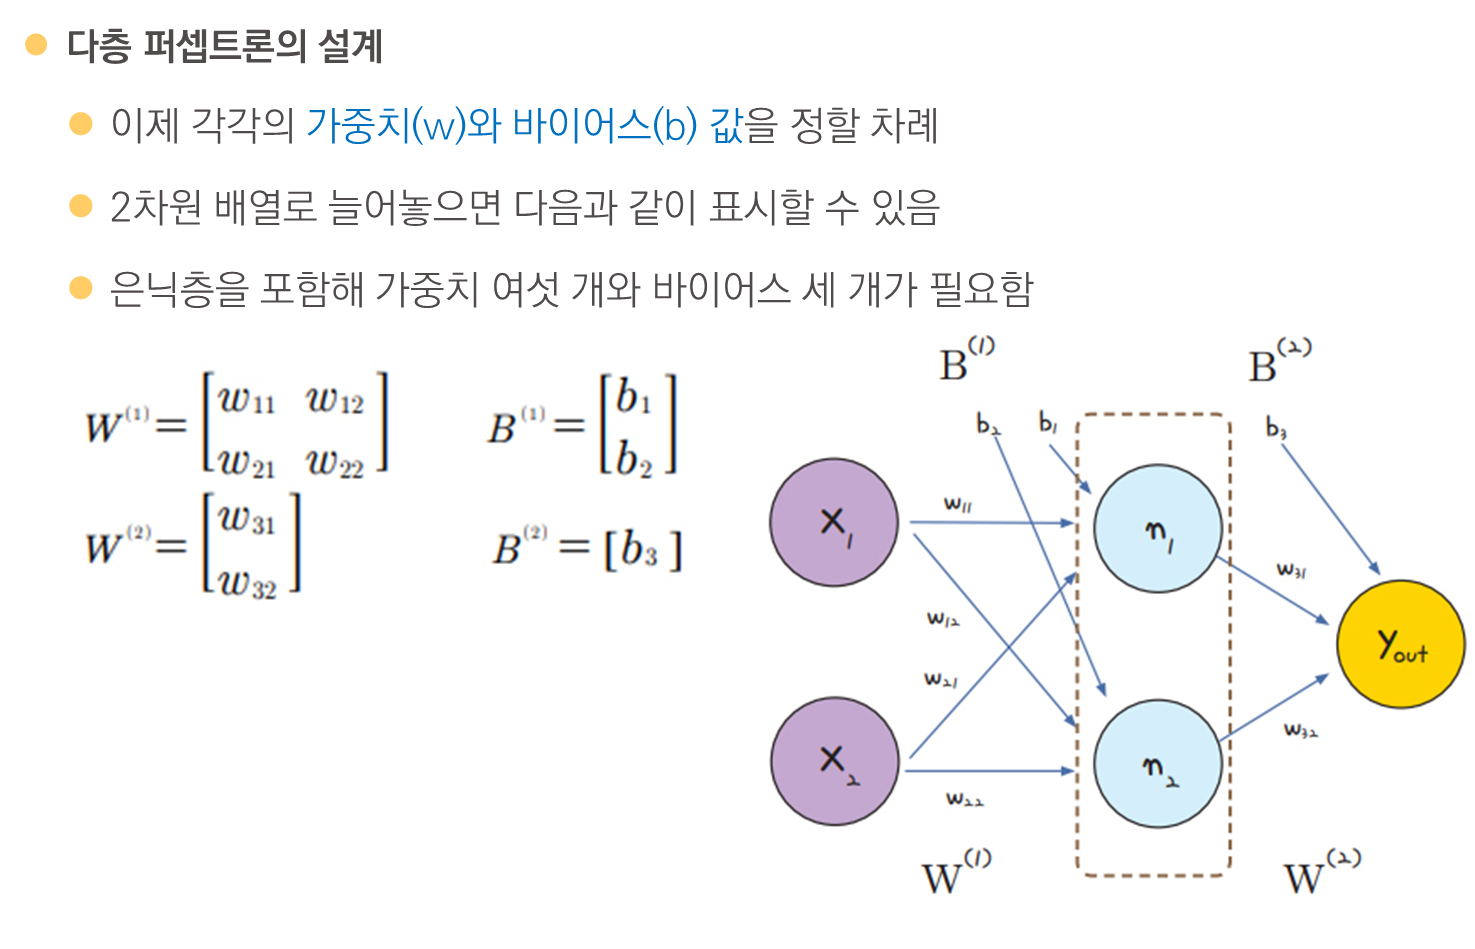

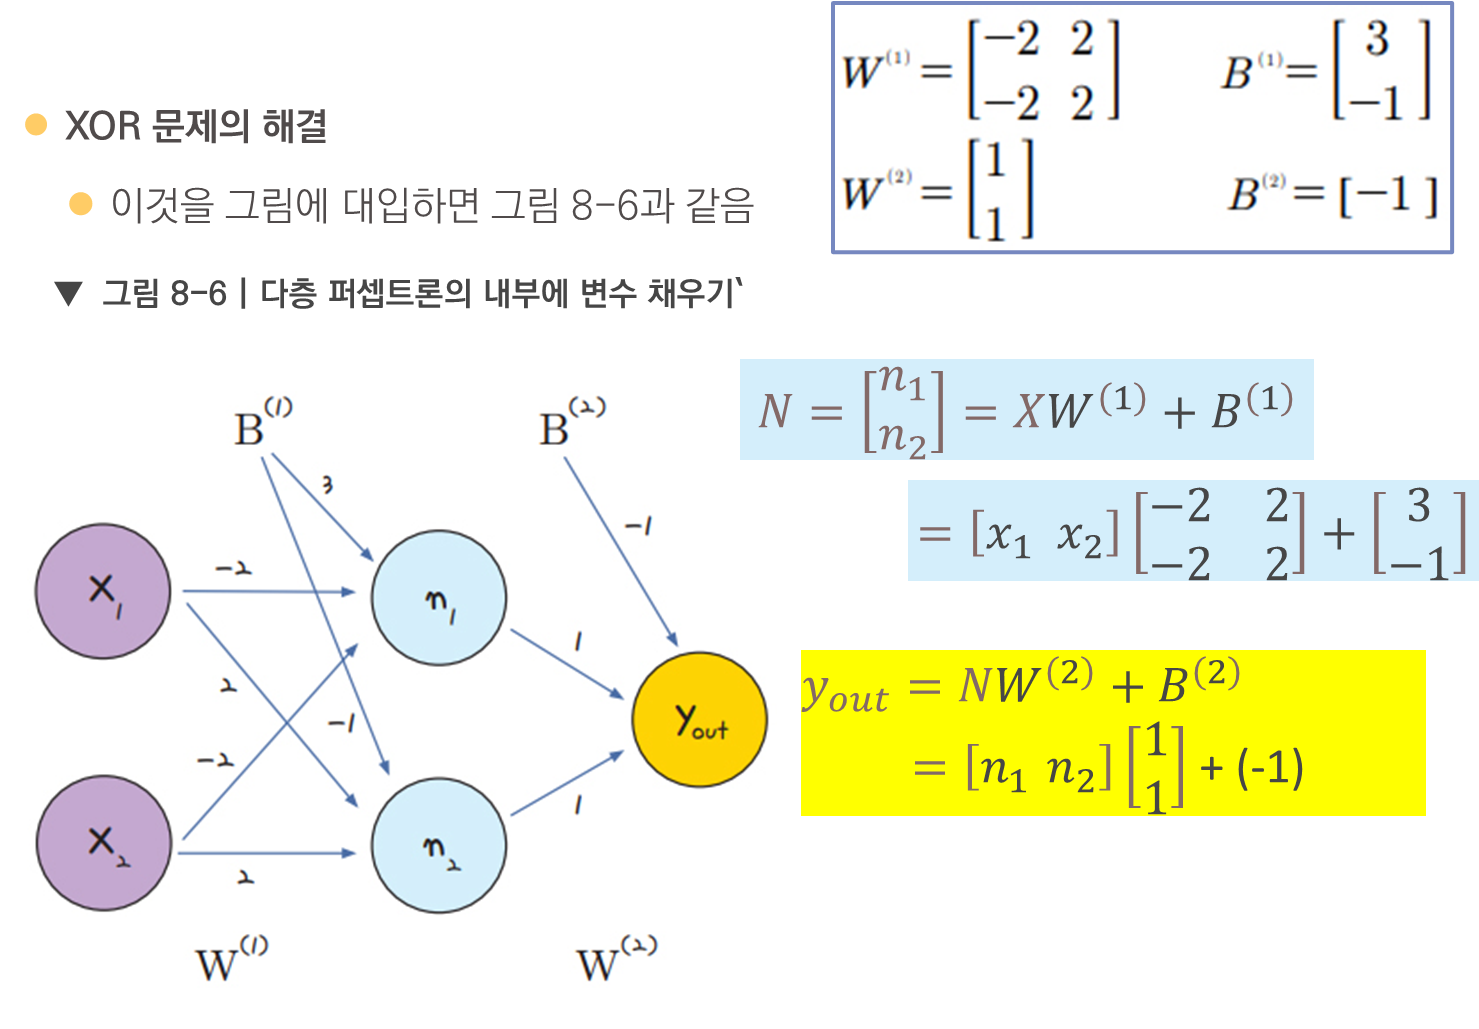

### 다층 퍼셉트론으로 XOR 문제 해결하기

In [28]:
#########################################################
# 다층 퍼셉트론으로 XOR 문제 해결하기
# - x1, x2 개별 입력으로 결과 얻기
#########################################################
import numpy as np

# 가중치와 바이어스
W_NAND = np.array([-2, -2])
W_OR = np.array([2, 2])
W_AND = np.array([1, 1])
b_NAND = 3
b_OR = -1
b_AND = -1

# 퍼셉트론
def MLP(x, w, b):
    y = np.sum(w * x) + b    # 가중합
    if y <= 0:
        return 0
    else:
        return 1

# NAND 게이트
def NAND(x1, x2):
    return MLP(np.array([x1, x2]), W_NAND, b_NAND)

# OR 게이트
def OR(x1, x2):
    return MLP(np.array([x1, x2]), W_OR, b_OR)

# AND 게이트
def AND(x1, x2):
    return MLP(np.array([x1, x2]), W_AND, b_AND)

# XOR 게이트
def XOR(x1, x2):
    return AND(NAND(x1, x2), OR(x1,x2))

# x1, x2 값을 번갈아 대입해 가며 최종 값 출력
for X in [(0, 0), (1, 0), (0, 1), (1, 1)]:
    y = XOR(X[0], X[1])
    print("입력 값: ", X,  " 출력 값: " , y)    

입력 값:  (0, 0)  출력 값:  0
입력 값:  (1, 0)  출력 값:  1
입력 값:  (0, 1)  출력 값:  1
입력 값:  (1, 1)  출력 값:  0


In [32]:
######################################################
# 다층 퍼셉트론 : 학습된 W와 b로 XOR Gate 만들기
# - X data array 입력으로 결과 얻기
######################################################
import numpy as np

def sigmoid(X, W, b): # round()로 0.5를 기준으로 1, 0으로 만들어줌
#     return (1 / (1 + np.exp(-(np.matmul(X, W) + b))))
    return (1 / (1 + np.exp(-(np.matmul(X, W) + b)))).round()

def NAND(X):
    W = np.array([[-2.], [-2.]])
    b = 3
    return sigmoid(X, W, b)

def OR(X):
    W = np.array([[2.], [2.]])
    b = - 1
    return sigmoid(X, W, b)

def AND(X):
    W = np.array([[1], [1]])
    b = - 1
    return sigmoid(X, W, b)

def XOR(X):
    return AND(np.hstack([NAND(X), OR(X)]))

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

print("XOR 진리표")
print(XOR(X), '\n')

for x1, x2 in X:
    print("입력값: ({}, {})  출력 값: {}"
          .format(x1, x2, int(XOR([x1, x2])[0])))


XOR 진리표
[[0.]
 [1.]
 [1.]
 [0.]] 

입력값: (0, 0)  출력 값: 0
입력값: (0, 1)  출력 값: 1
입력값: (1, 0)  출력 값: 1
입력값: (1, 1)  출력 값: 0


In [33]:
AND(X)

array([[0.],
       [0.],
       [0.],
       [1.]])

In [34]:
OR(X)

array([[0.],
       [1.],
       [1.],
       [1.]])

In [35]:
NAND(X)

array([[1.],
       [1.],
       [1.],
       [0.]])

In [36]:
XOR(X)

array([[0.],
       [1.],
       [1.],
       [0.]])